In [1]:
import os
import sys
sys.path.append('../source')

from EBC import EBC
import numpy as np

In [2]:
samples_full = np.load('../source/examples/data/10_well_trajectory_5.npy')
energies_full = np.load('../source/examples/data/10_well_potential_5.npy') 

samples = samples_full[::100]
energies = energies_full[::100]

In [3]:
ebc = EBC(n_clusters=10, temperature=1) 
ebc.fit(samples, energies)

Proto radius set to:  0.676195642807478
Using 830 proto clusters.
Using the eigenvector corresponding to an eigenvalue of 1.0000000000000016.


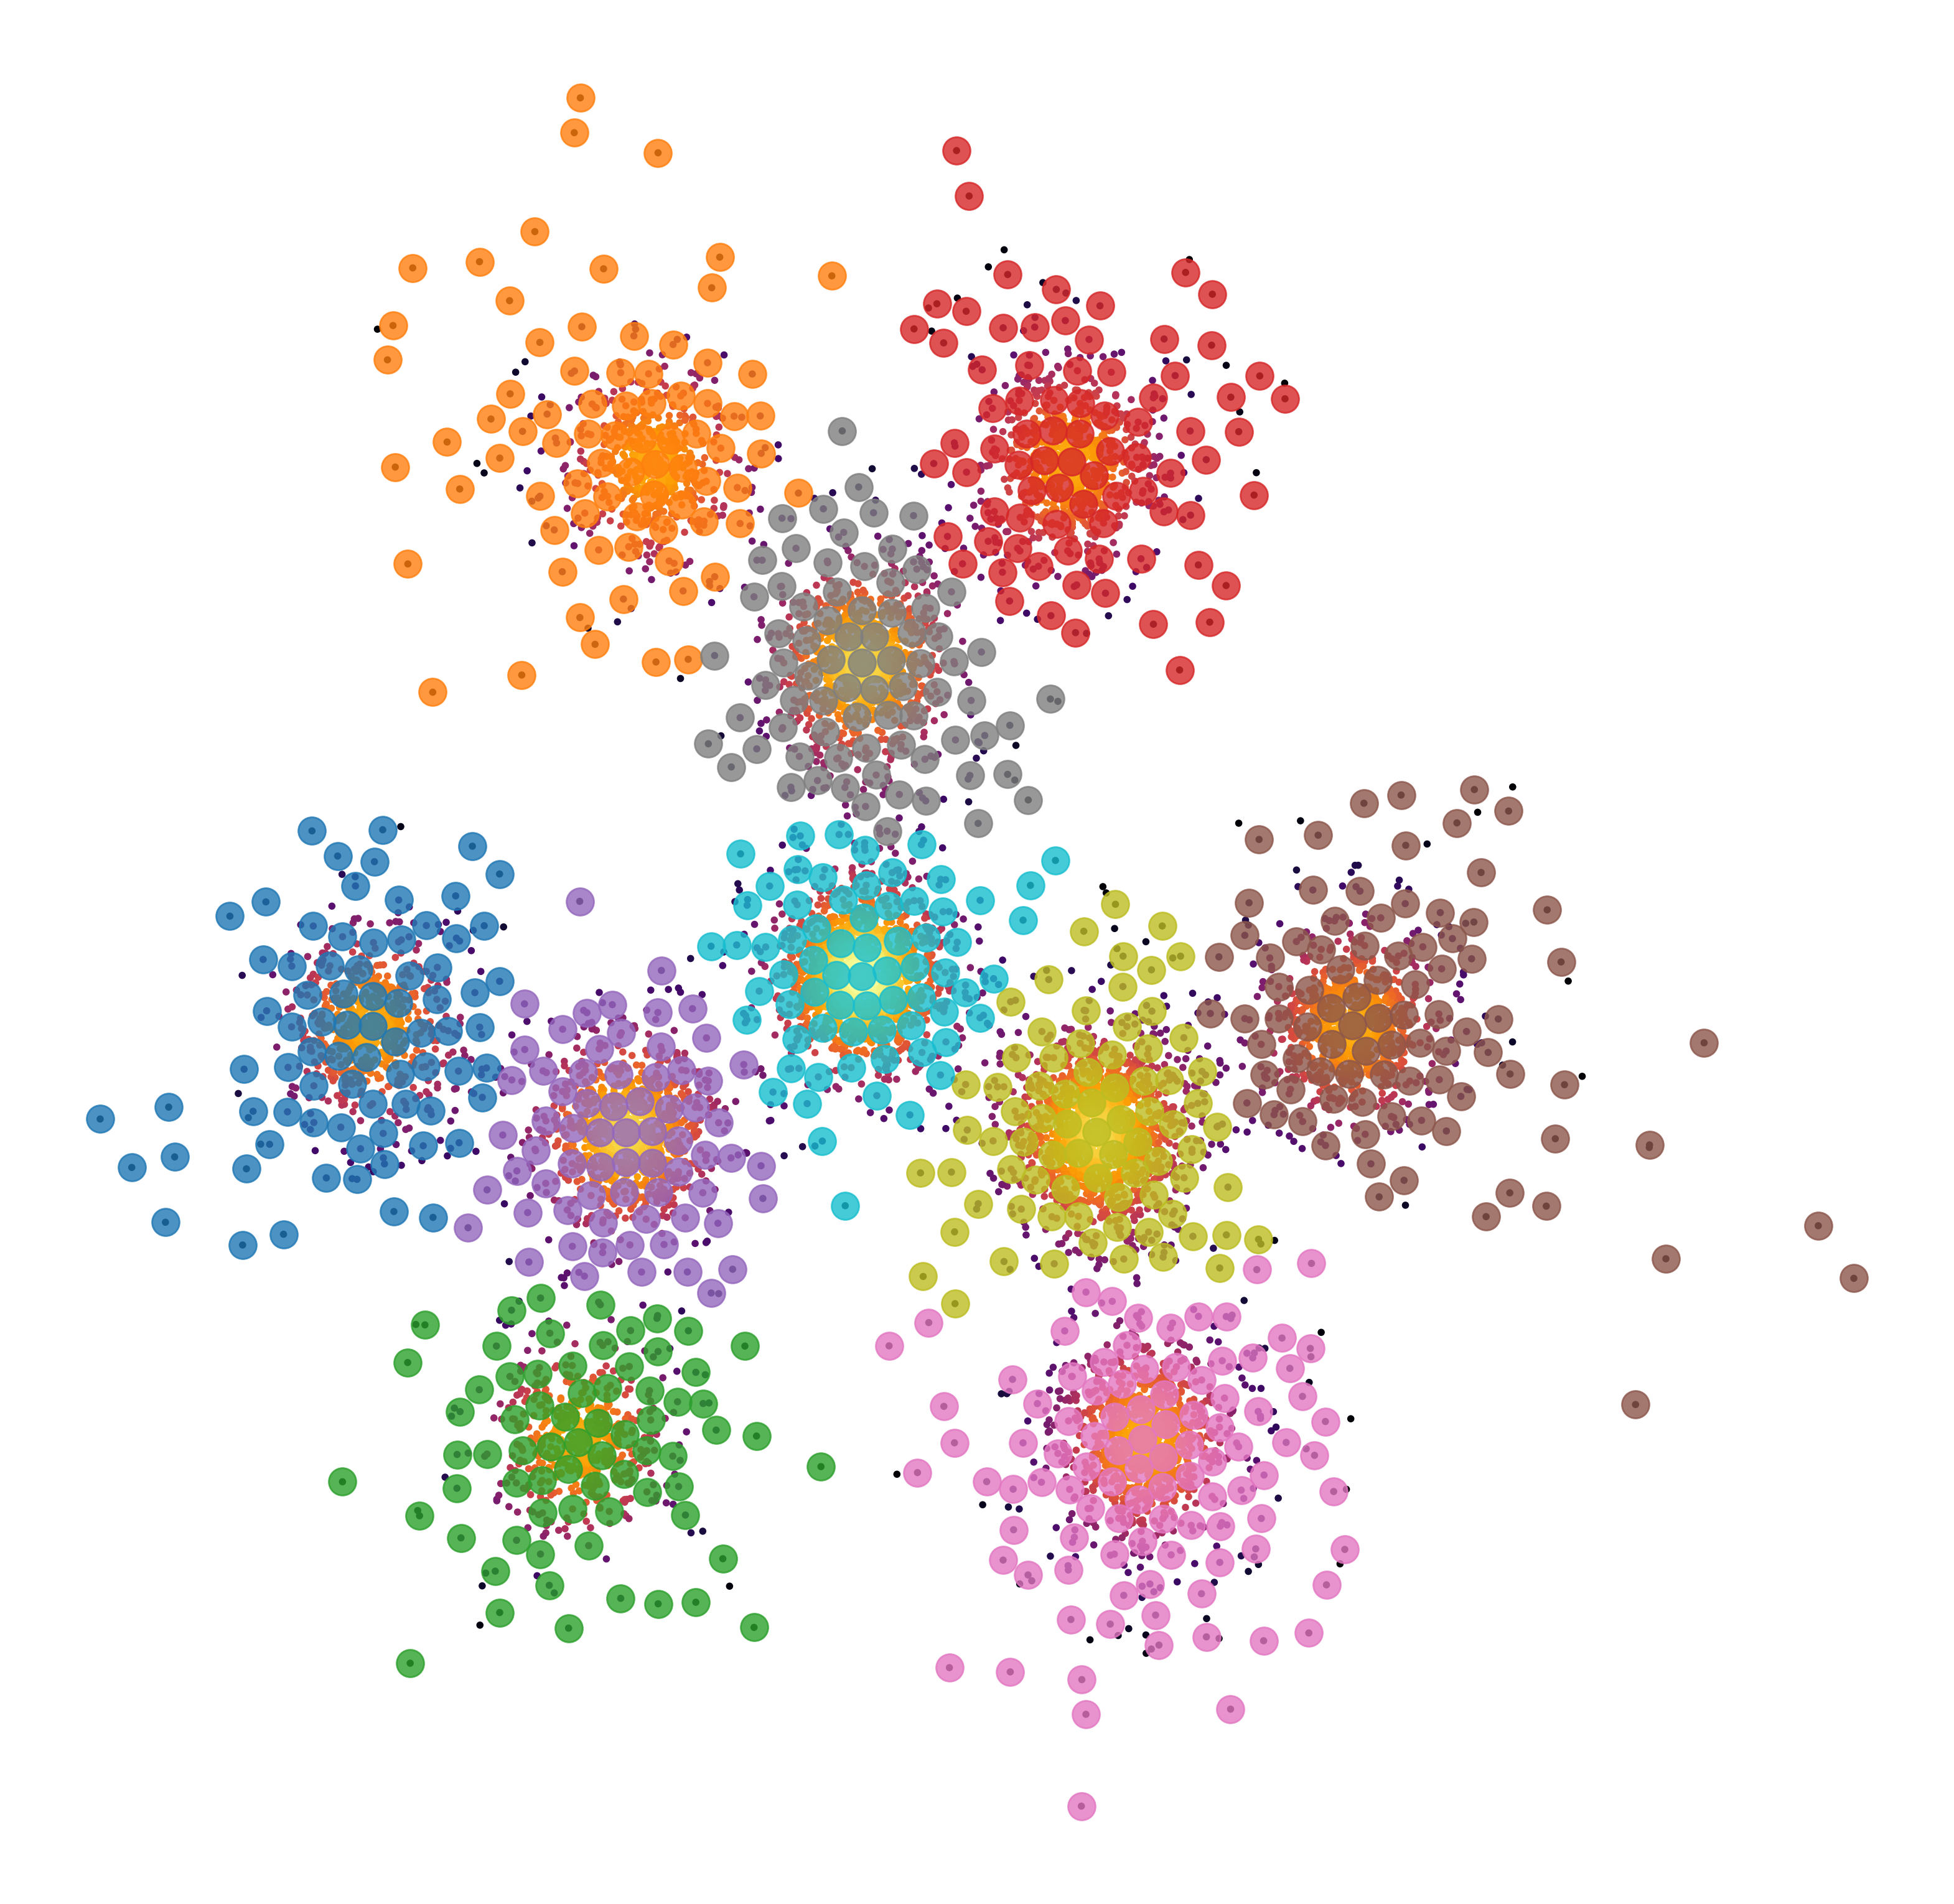

In [136]:
ebc.show();

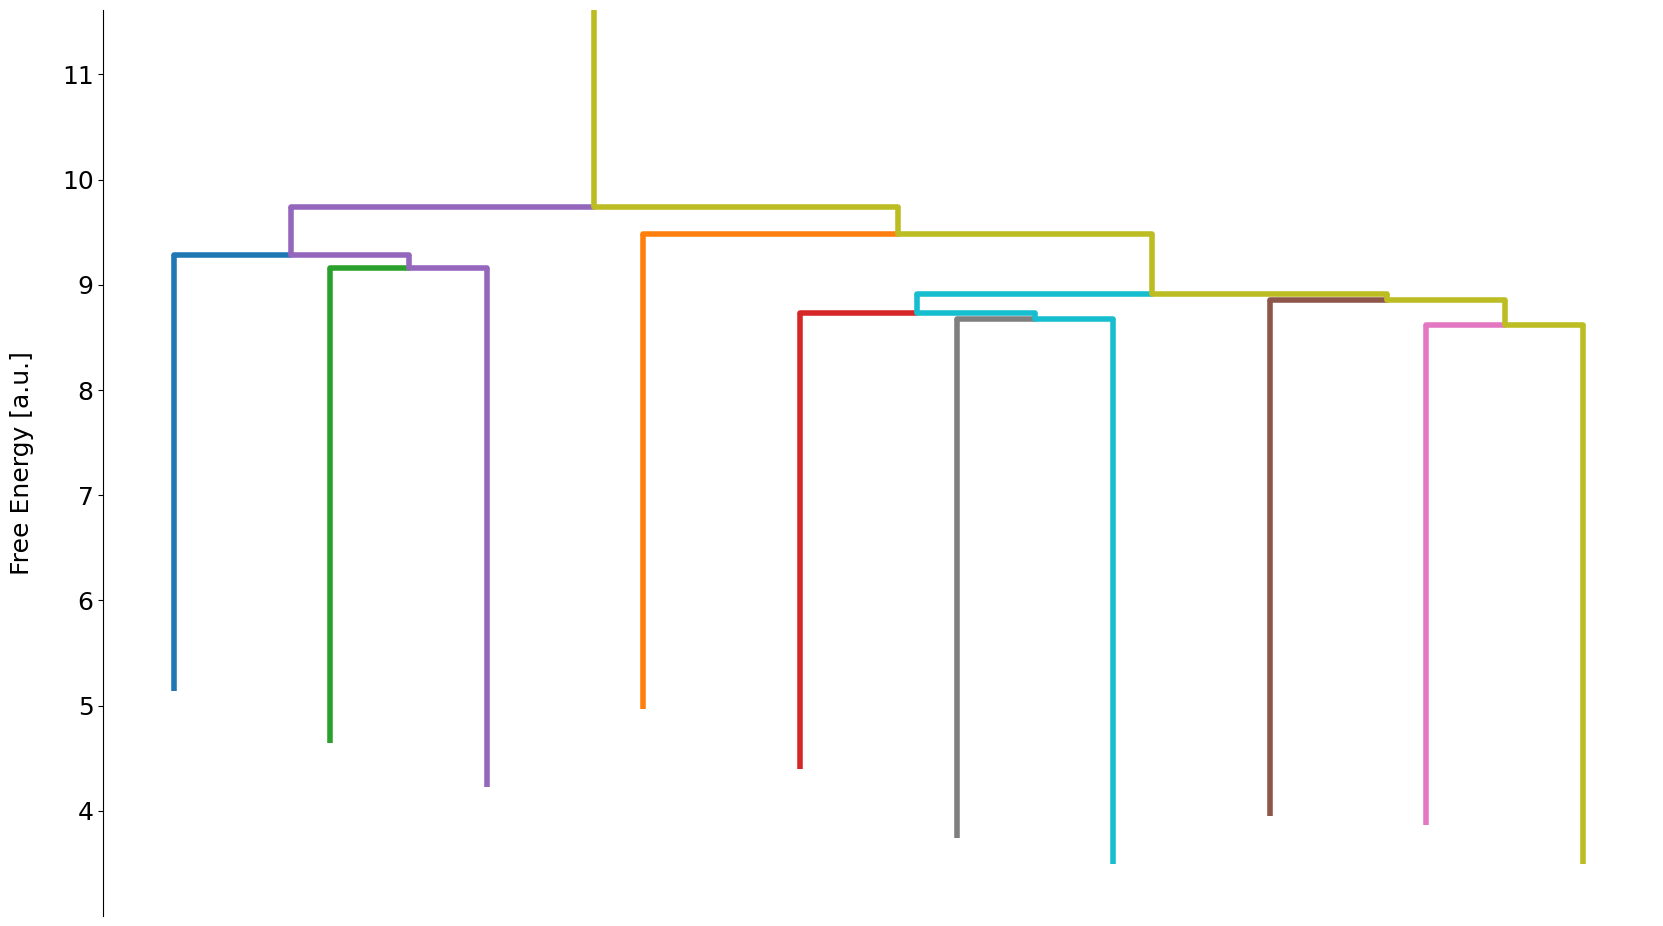

In [137]:
ebc.hierarchical();

In [22]:
import matplotlib.pyplot as plt

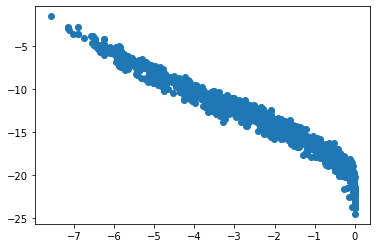

In [23]:
plt.scatter(energies[ebc._proto_centers], np.log(ebc.pi, ))

In [24]:
ebc = EBC(n_clusters=10, temperature=0.5, mode='knnr') 
ebc.fit(samples, energies)

Proto radius set to:  0.6627591835761075
Using 851 proto clusters.
Using the eigenvector corresponding to an eigenvalue of 0.999999999999999.


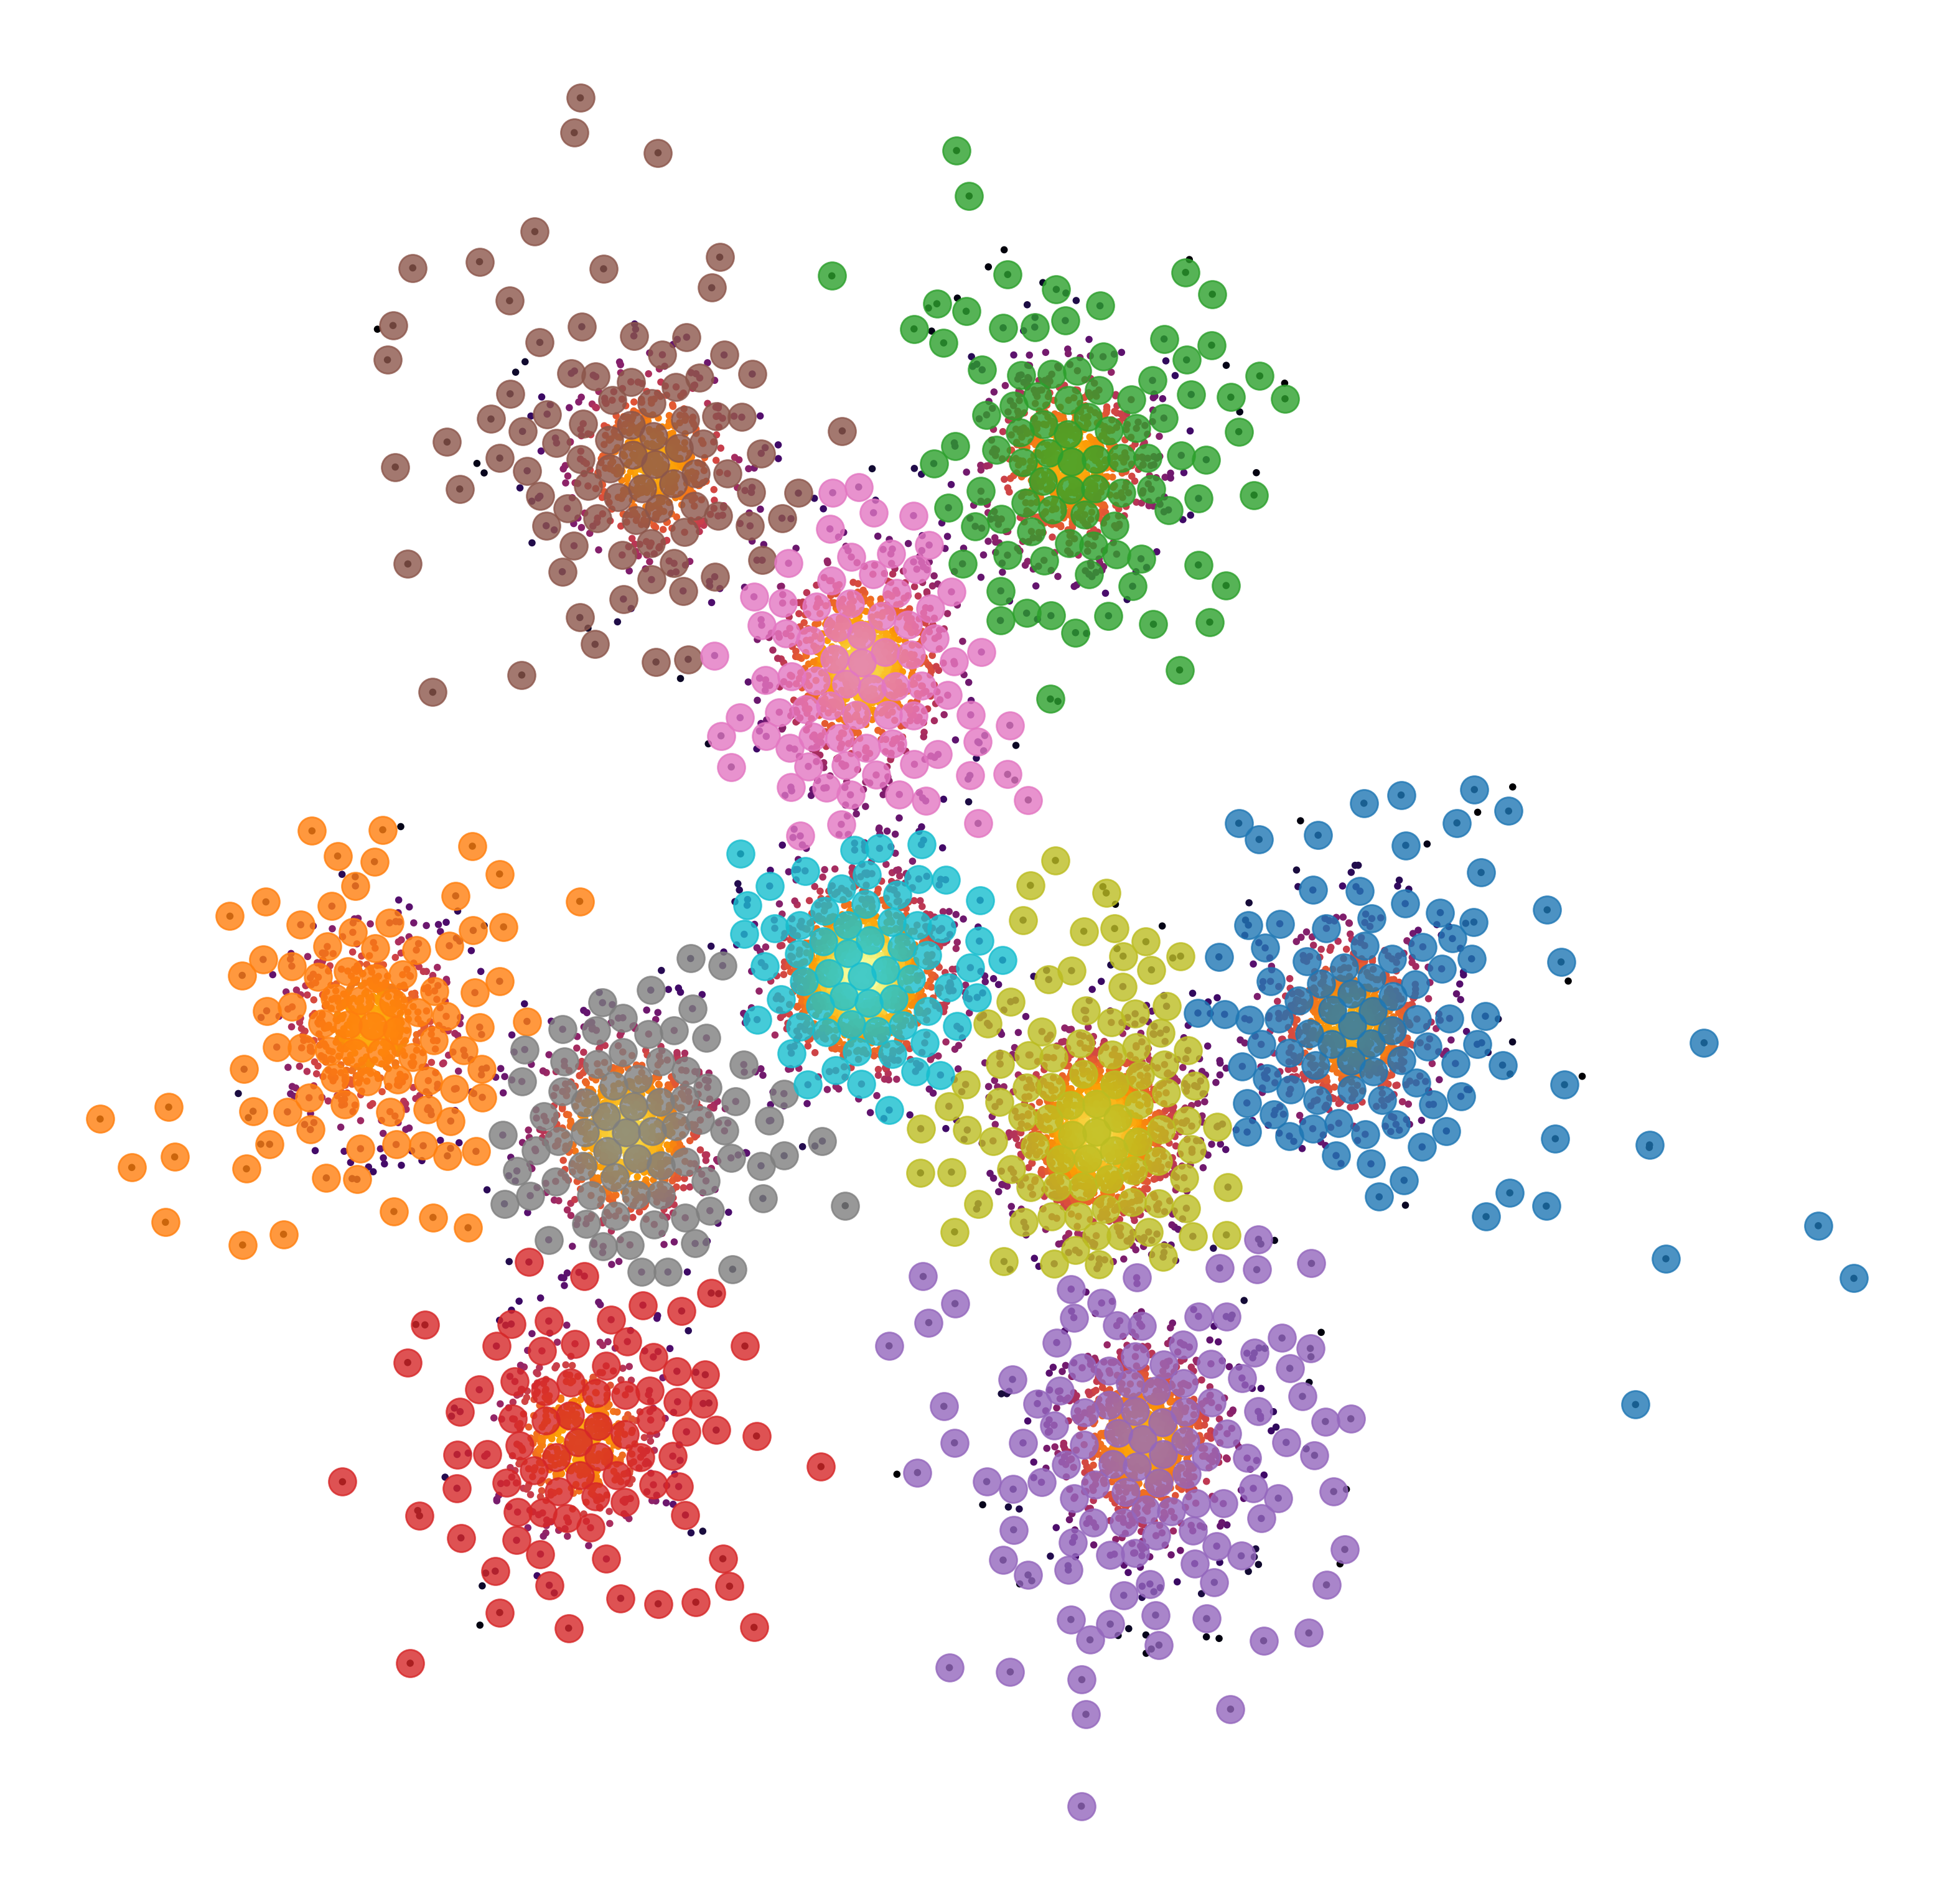

In [25]:
ebc.show();

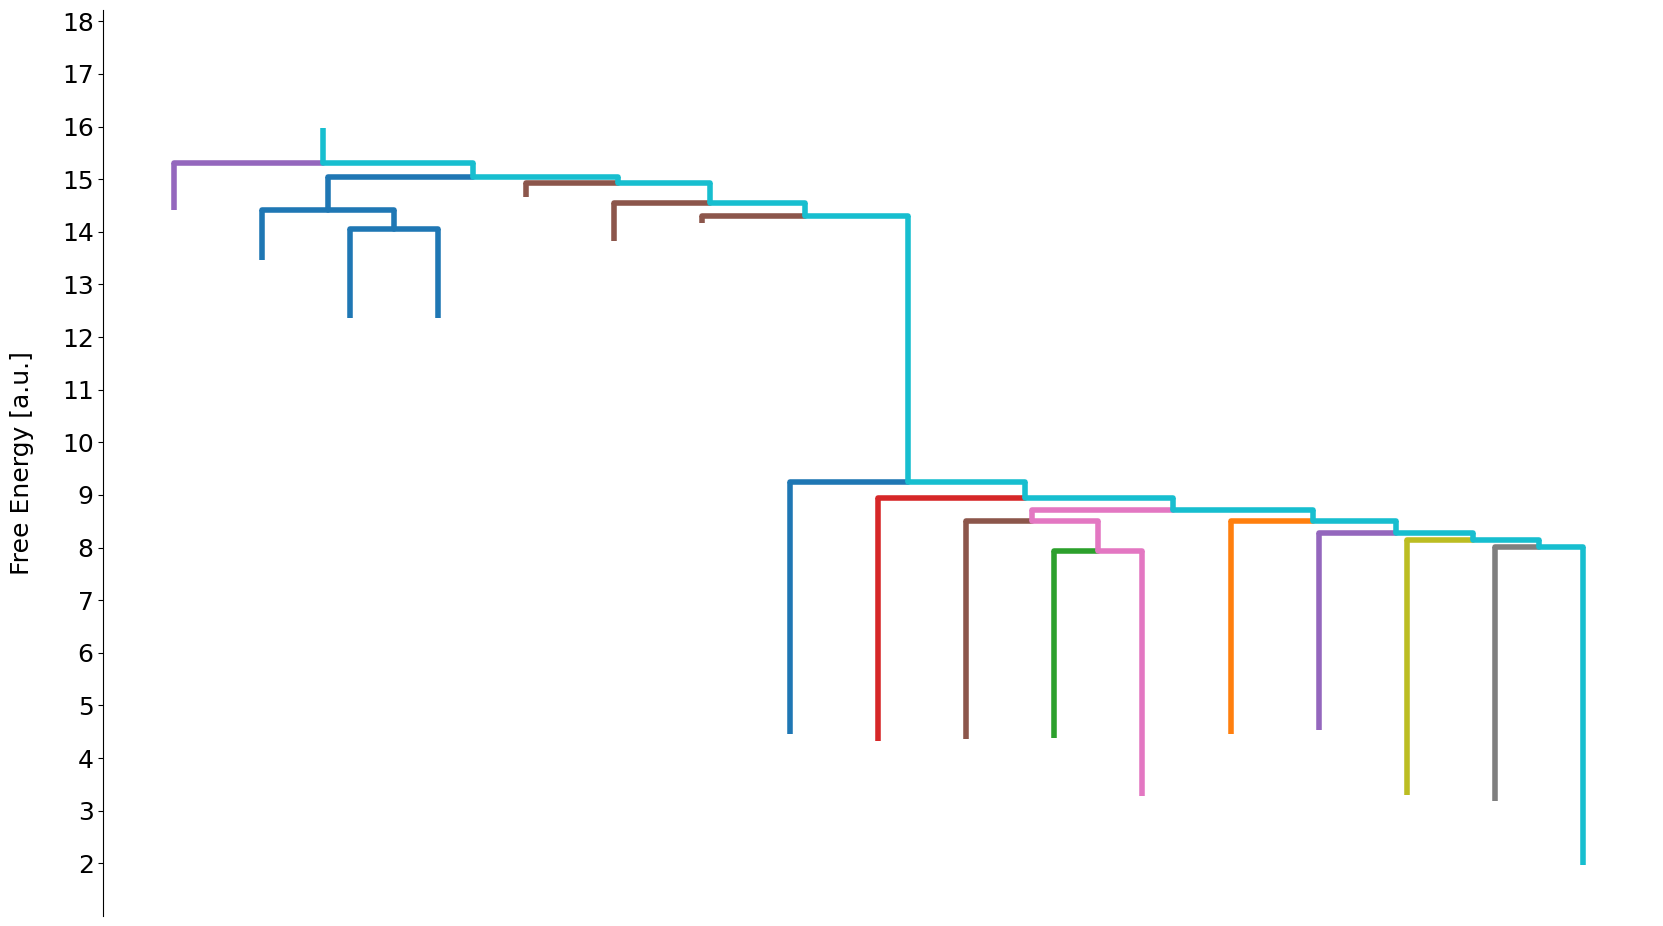

In [26]:
ebc.hierarchical();

In [181]:
ebc_sparse = EBC(temperature=1, n_clusters=10, proto_radius=2, knn=3, use_sparse=True) 
ebc_sparse.fit(samples, energies)
ebc = EBC(temperature=1, n_clusters=10, proto_radius=2, knn=3, use_sparse=False) 
ebc.fit(samples, energies)
pi_sparse = np.copy(ebc_sparse.pi)
pi = np.copy(ebc.pi)
assert np.allclose(pi, pi_sparse)

Using 169 proto clusters.
Using the eigenvector corresponding to an eigenvalue of 0.9999999999999989.
Using 169 proto clusters.
Using the eigenvector corresponding to an eigenvalue of 0.9999999999999947.


In [182]:
np.allclose(ebc.labels, ebc_sparse.labels)

True

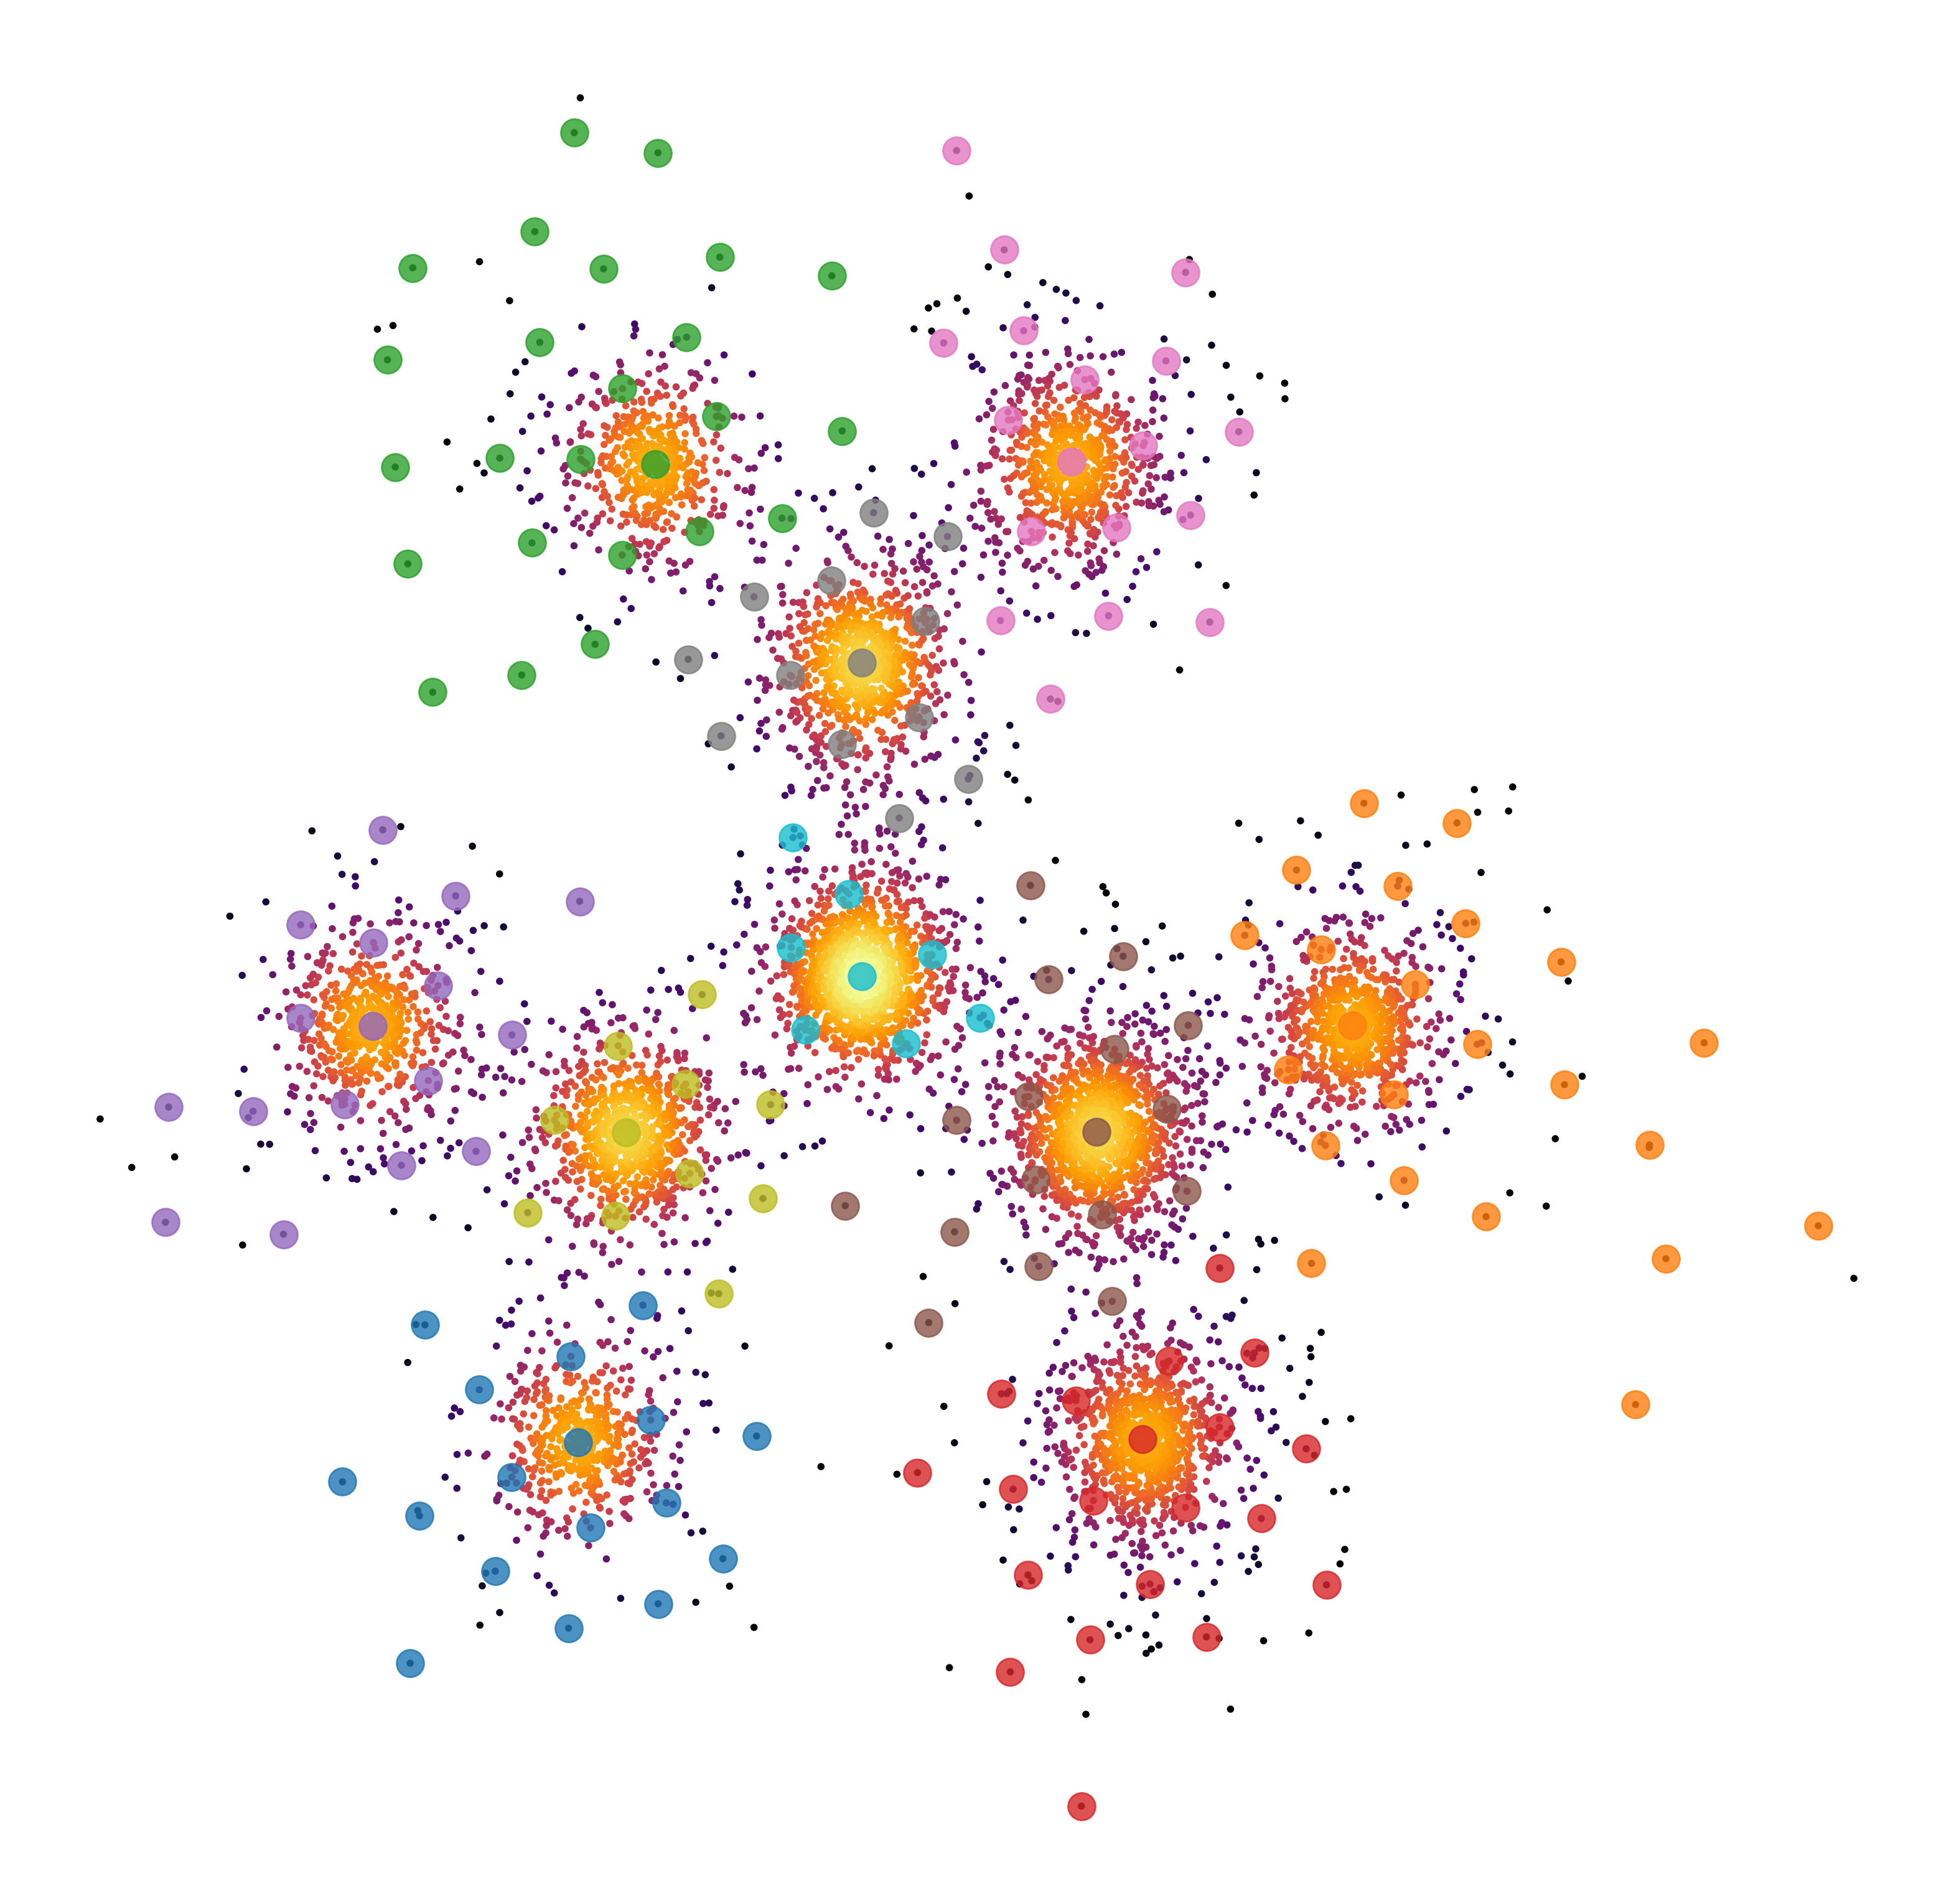

In [183]:
ebc.show();

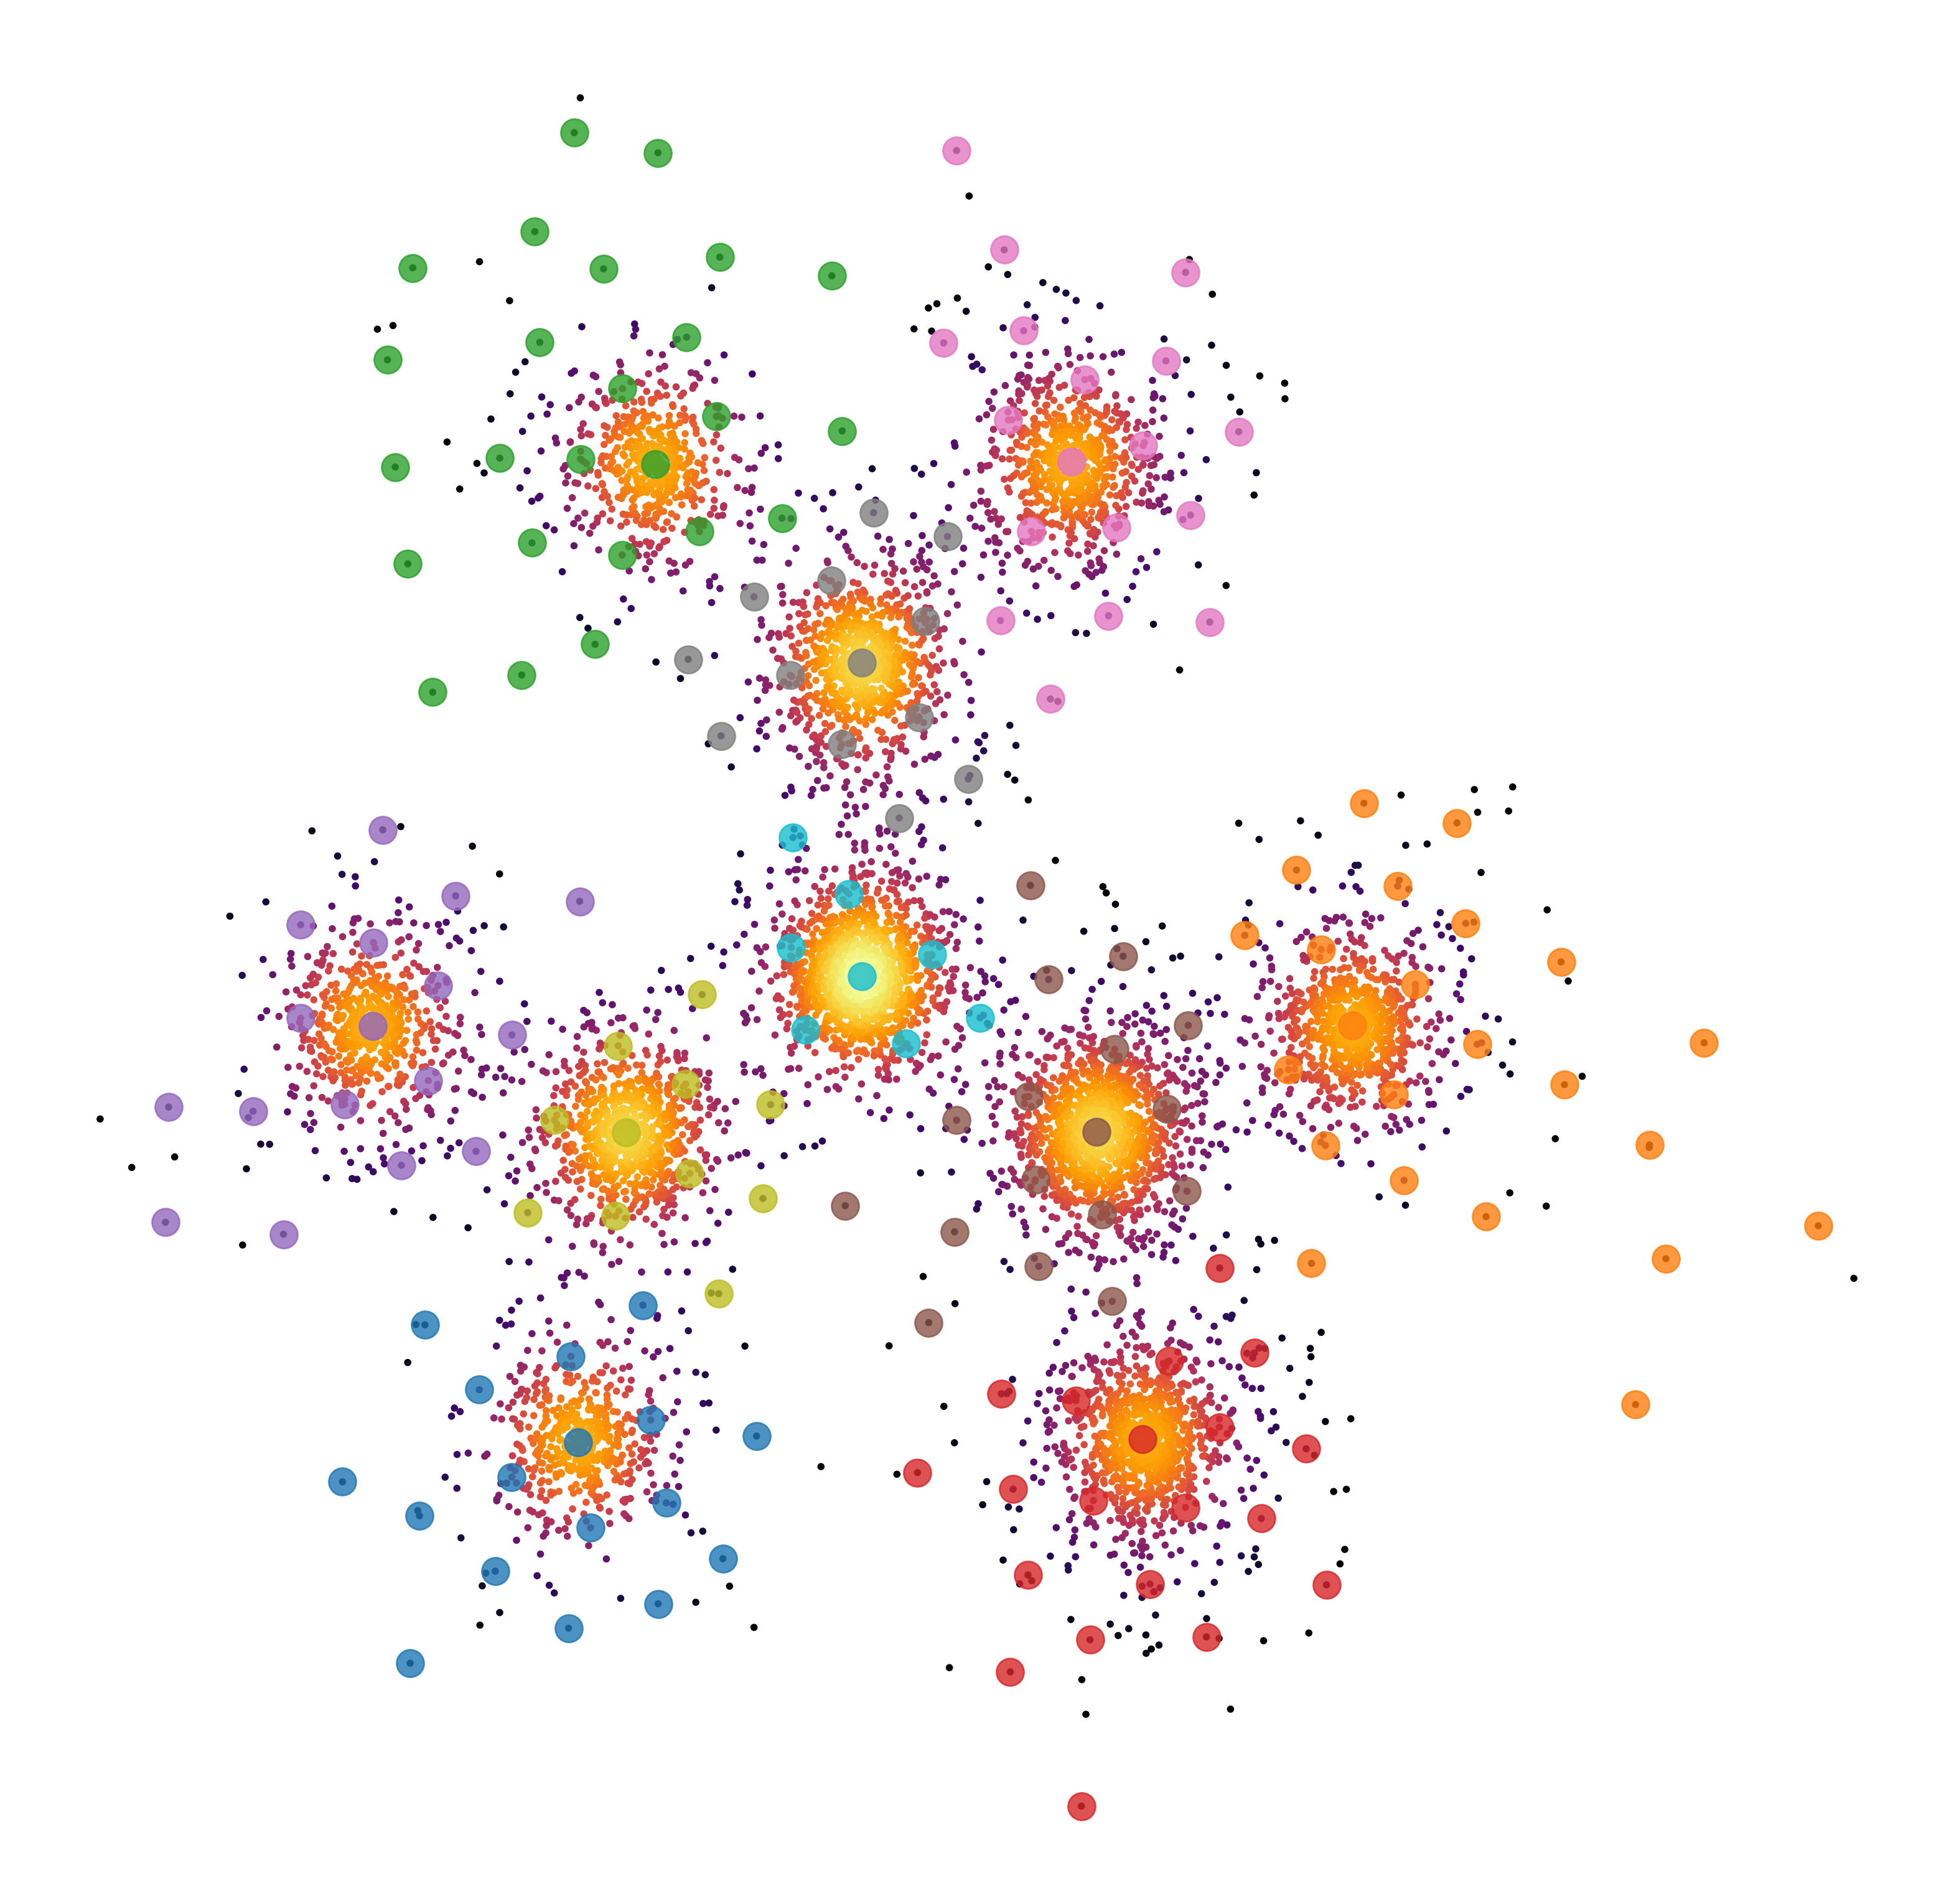

In [184]:
ebc_sparse.show();